In [28]:
#Preprocessing Phase
import pandas as pd 
import numpy as np
df=pd.read_csv("C:\\Users\\Fadi\\Downloads\\titanic-passengers.csv", delimiter= ";", encoding= "ISO-8859-1")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#DataCleaning
df= df.dropna(subset = ['Embarked'])
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
#Categorical Data Fillna
number_of_elements= len(df['Cabin'])
print("Number of elements: ", number_of_elements)
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6', inplace=True)

Number of elements:  889
G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
              ..
C46            1
A31            1
C128           1
C30            1
E63            1
Name: Cabin, Length: 146, dtype: int64


In [13]:
#Verification that the data is ready to be treated:
df.isnull().sum().sum()

0

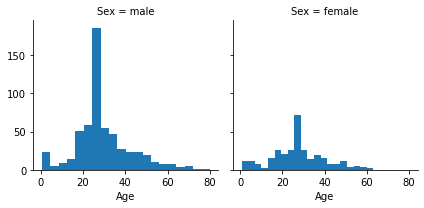

In [17]:
#Data Visualization Phase
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.FacetGrid(df, col= "Sex")
g.map(plt.hist,"Age", bins=20)

C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


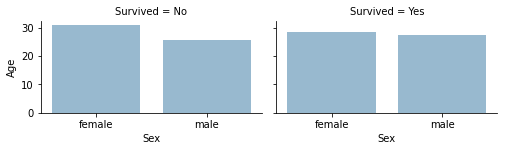

In [152]:
# grid = sns.FacetGrid(df, row="Survived", col="Sex", size=2.2, aspect=1.6)
# grid.map(sns.barplot, "Age", alpha=.5, ci=None)
# grid.add_legend()
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", "Age", alpha=.5, ci=None)
grid.add_legend()

C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


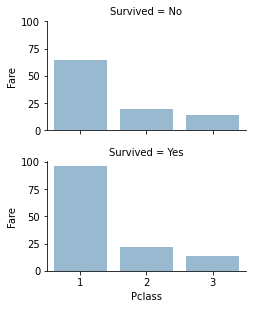

In [18]:
#The impact of Pclass and Fare features on Surviving
grid = sns.FacetGrid(df,"Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Pclass","Fare", alpha=.5, ci=None)
grid.add_legend()

In [19]:
print(df.corr())

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035330  0.031319 -0.057686 -0.001657  0.012703
Pclass         -0.035330  1.000000 -0.336512  0.081656  0.016824 -0.548193
Age             0.031319 -0.336512  1.000000 -0.232543 -0.171485  0.093707
SibSp          -0.057686  0.081656 -0.232543  1.000000  0.414542  0.160887
Parch          -0.001657  0.016824 -0.171485  0.414542  1.000000  0.217532
Fare            0.012703 -0.548193  0.093707  0.160887  0.217532  1.000000


<AxesSubplot:>

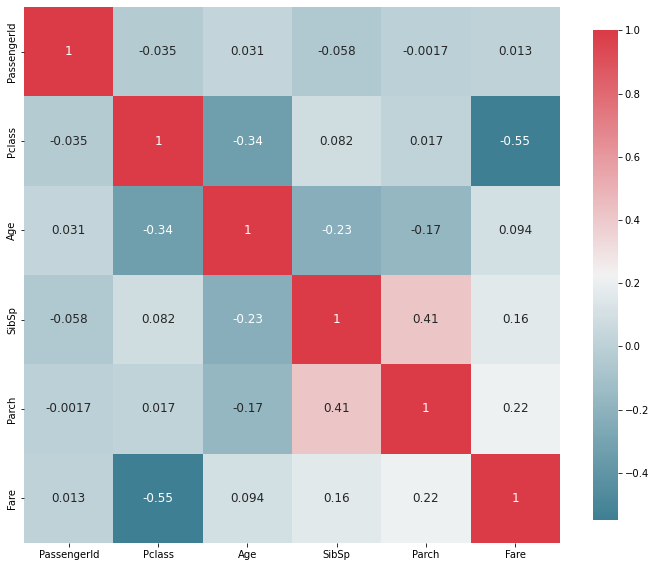

In [20]:
#The Function
#The map represents the correlation between features (The Pearson's Correlation).
#The diagonal is dark red, with the value=1, because those squares coreelates the one feature to itself.
#The rest squares are lighter colors because they lesser than 1 or -1 (value of perfect correlation).
#So, it tells us how strong is the correlation between features.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_correlation_map(df):
    corr = df.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(df.corr(), cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })


<AxesSubplot:xlabel='Pclass'>

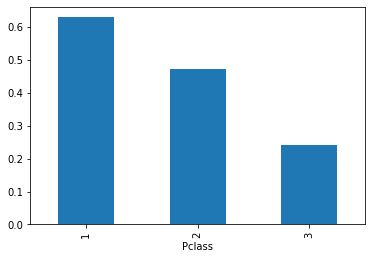

In [58]:
#converting Survived column into numerical format
cleanup={"Survived":{"Yes":1, "No": 0}}
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()
df['Survived'].groupby(df['Pclass']).mean().plot(kind='bar')

In [27]:
#dropping Name column
# df.drop('Name', inplace=True, axis=1)

In [29]:
df['Title'] = df['Name'].str.split(',|\\.',expand = True)[1]
df['Title'] = df['Title'].str.strip()
df['Title'].value_counts() 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

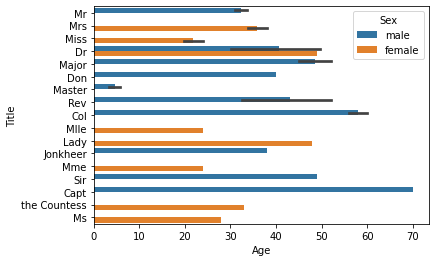

In [30]:
ax = sns.barplot(x="Age", y="Title", hue="Sex", data=df)

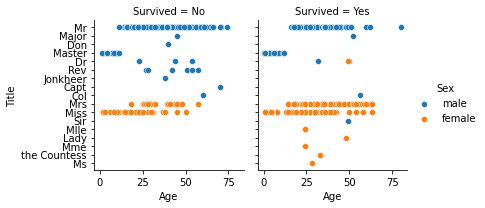

In [31]:
g = sns.FacetGrid(df, col="Survived", hue="Sex")
g.map_dataframe(sns.scatterplot, x="Age", y="Title")
g.add_legend()

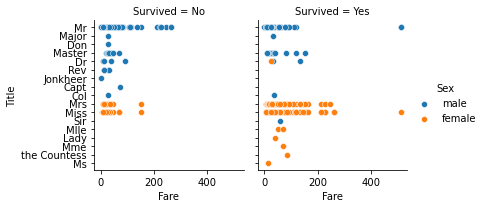

In [296]:
g = sns.FacetGrid(df, col="Survived", hue="Sex")
g.map_dataframe(sns.scatterplot, x="Fare", y="Title")
g.add_legend()

In [39]:
mydict= {"Capt":"Officer" , "Col": "Officer" , "Major":"Officer" , "Dr": "Officer", "Rev":"Officer", "Jonkheer":"Royalty",
"Don":"Royalty", "Sir":"Royalty", "Lady" : "Royalty","the Countess":"Royalty", "Dona":"Royalty","Mme": "Miss", "Mlle":"Miss",
"Miss" :"Miss", "Ms":  "Mrs", "Mr" :  "Mrs","Mrs" : "Mrs", "Master" : "Master"}

df['NewTitle'] = df['Title'].map(mydict)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewTitle
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr,Mrs
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr,Mrs


In [40]:
df['NewTitle'].value_counts() 

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: NewTitle, dtype: int64

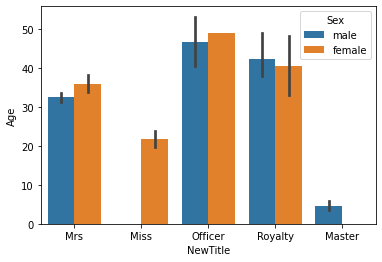

In [42]:
ax = sns.barplot(x="NewTitle", y="Age", hue="Sex", data=df)

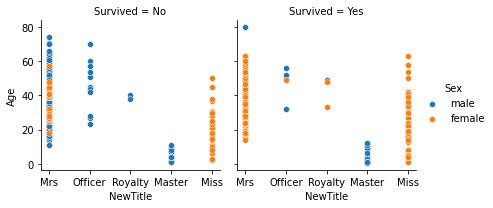

In [44]:
g = sns.FacetGrid(df, col="Survived", hue="Sex")
g.map_dataframe(sns.scatterplot, x="NewTitle", y="Age")
g.add_legend()

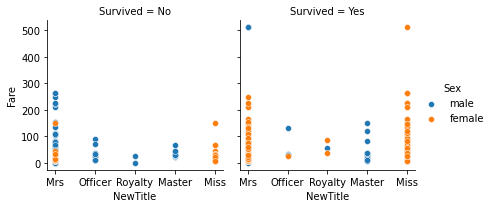

In [45]:
g = sns.FacetGrid(df, col="Survived", hue="Sex")
g.map_dataframe(sns.scatterplot, x="NewTitle", y="Fare")
g.add_legend()

In [48]:
df['FamilySize'] = df['Parch'] + df['SibSp']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NewTitle,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,Mrs,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,Mrs,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs,1


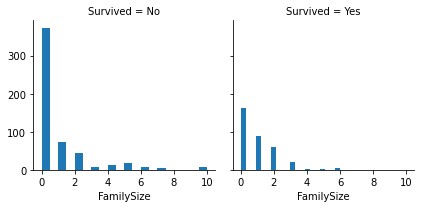

In [49]:
g=sns.FacetGrid(df, col= "Survived")
g.map(plt.hist,"FamilySize", bins=20)

<AxesSubplot:xlabel='FamilySize'>

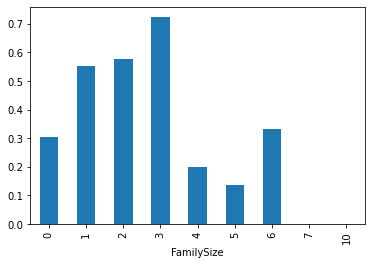

In [59]:
cleanup={"Survived":{"Yes":1, "No": 0}}
df.replace(cleanup, inplace=True)
df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean()
df['Survived'].groupby(df['FamilySize']).mean().plot(kind='bar')

#FamilySize Feature is useful because it shows that Family with lesser members(probably father, mother and child) have been survived